In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/african-national-football-from-2010-2024/African-Nations-results.csv


In [32]:
data = pd.read_csv('/kaggle/input/african-national-football-from-2010-2024/African-Nations-results.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1/2/2010,Qatar,Mali,0,0,Friendly
1,1/2/2010,Syria,Zimbabwe,6,0,Friendly
2,1/3/2010,Angola,Gambia,1,1,Friendly
3,1/4/2010,Egypt,Mali,1,0,Friendly
4,1/4/2010,Tanzania,Ivory Coast,0,1,Friendly


In [33]:
# Adding "result" column to data
data['result'] = 'Draw'
data.loc[data['home_score'] > data['away_score'], 'result'] = 'Home Win'
data.loc[data['home_score'] < data['away_score'], 'result'] = 'Away Win'

data.head()

,date,home_team,away_team,home_score,away_score,tournament,result
0,1/2/2010,Qatar,Mali,0,0,Friendly,Draw
1,1/2/2010,Syria,Zimbabwe,6,0,Friendly,Home Win
2,1/3/2010,Angola,Gambia,1,1,Friendly,Draw
3,1/4/2010,Egypt,Mali,1,0,Friendly,Home Win
4,1/4/2010,Tanzania,Ivory Coast,0,1,Friendly,Away Win


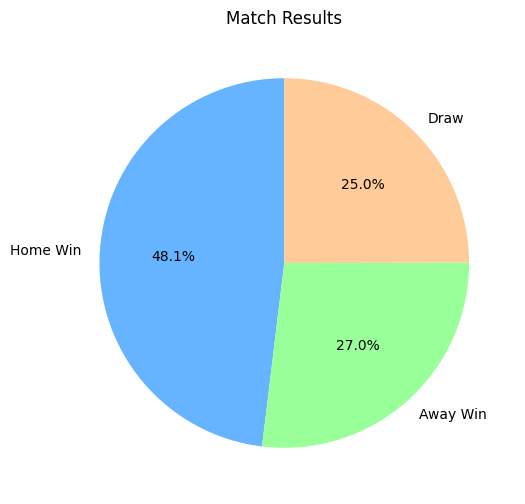

In [34]:
plt.figure(figsize = (6, 6))
plt.pie(data['result'].value_counts(), labels=data['result'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Match Results')
plt.show()

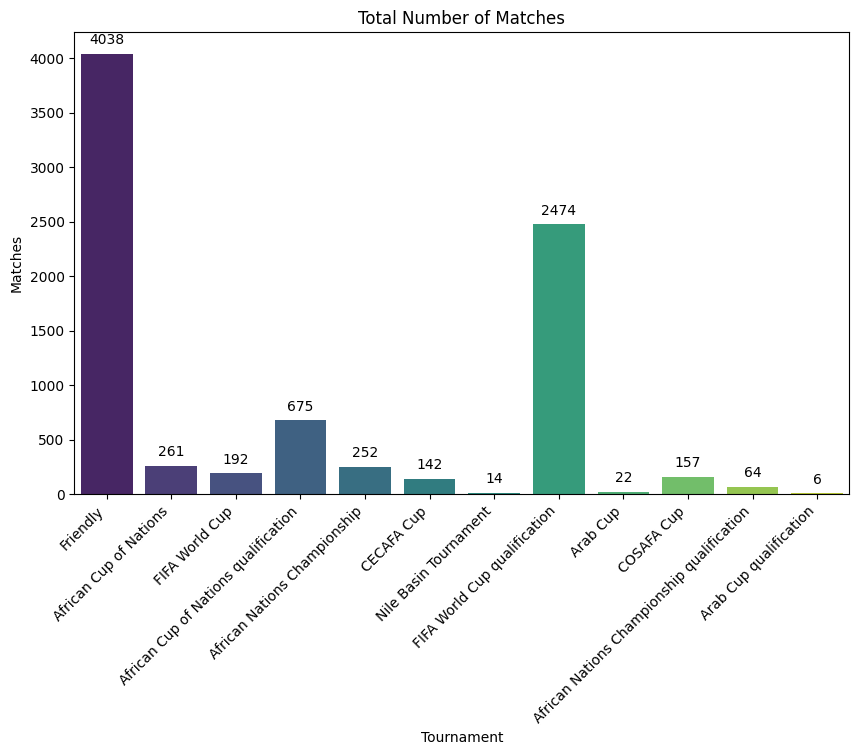

In [35]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'tournament', data = data, palette = 'viridis')

# Writing labels to each column
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext=(0, 10), textcoords = 'offset points')

plt.title('Total Number of Matches')
plt.xlabel('Tournament')
plt.ylabel('Matches')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [41]:
# Getting winner and loser countries
data['winner'] = data.apply(lambda row: 'Tie' if row['result'] == 'Draw' else row['home_team'] if row['result'] == 'Home Win' else row['away_team'], axis=1)
data['loser'] = data.apply(lambda row: 'Tie' if row['result'] == 'Draw' else row['home_team'] if row['result'] == 'Away Win' else row['away_team'], axis=1)

# Top 5 winner countries
top_winners = data[data['winner'] != 'Tie']['winner'].value_counts().head(5)

# Top 5 loser countries
top_losers = data[data['loser'] != 'Tie']['loser'].value_counts().head(5)

fig_winners = px.bar(x = top_winners.index, y = top_winners, labels = {'x': 'Country', 'y': 'Win Number'}, title='Top 5 Winning Teams')
fig_winners.show()

fig_losers = px.bar(x = top_losers.index, y = top_losers, labels={'x': 'Country', 'y': 'Lose Number'}, title='Top 5 Losing Teams')
fig_losers.show()


In [48]:
data['scorer'] = data.apply(lambda row: row['home_team'] if row['result'] == 'Home Win' else row['away_team'] if row['result'] == 'Away Win' else None, axis=1)
data['goal_diff'] = data['home_score'] - data['away_score']

# Top 5 Scorer Countries
top_scorers = data.groupby('scorer')['home_score'].sum().reset_index(name='total_goals').nlargest(5, 'total_goals')

# Top 5 Countries Conceding the Most Goals
top_conceders = data.groupby('scorer')['away_score'].sum().reset_index(name='total_goals_conceded').nlargest(5, 'total_goals_conceded')

fig_scorers = px.bar(x=top_scorers['scorer'], y=top_scorers['total_goals'], labels={'x': 'Country', 'y': 'Total Goals'},
                     title='Top 5 Scorer Countries', color=top_scorers['scorer'])
fig_scorers.show()

fig_conceders = px.bar(x=top_conceders['scorer'], y=top_conceders['total_goals_conceded'], labels={'x': 'Country', 'y': 'Total Conceding Goals'},
                       title='Top 5 Teams Conceding the Most Goals', color=top_conceders['scorer'])
fig_conceders.show()